In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import ROOT
import uproot
import astropy.io.fits as fits

In [2]:
# ubicación de los archivos de entrada y salida
root_folder = r'./datos_root/'
fits_folder = './datos_fits/'
png_folder = './datos_png/'
filename = 'catalog_data_6322_to_6474.root'

# lee el archivo root
# file = ROOT.TFile.Open(root_folder+filename)
# for tree in file.GetListOfKeys():
#     print(tree)
file = uproot.open(root_folder+filename)
file.keys()

['config;1', 'hitSumm;1']

In [3]:
# número de filas o instancias
print(f'{file["hitSumm;1"].num_entries} entries')
print()

# información sobre los atributos o columnas
file['hitSumm;1'].show()

3039079 entries

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runID                | int32_t                  | AsDtype('>i4')
ohdu                 | int32_t                  | AsDtype('>i4')
expoStart            | int32_t                  | AsDtype('>i4')
nSat                 | int32_t                  | AsDtype('>i4')
flag                 | int32_t                  | AsDtype('>i4')
xMin                 | int32_t                  | AsDtype('>i4')
xMax                 | int32_t                  | AsDtype('>i4')
yMin                 | int32_t                  | AsDtype('>i4')
yMax                 | int32_t                  | AsDtype('>i4')
E0                   | float                    | AsDtype('>f4')
n0                   | float                    | AsDtype('>f4')
xBary0               | float                    | AsDtype('>f4')
yBary0               | float             

In [4]:
# configuraciones del archivo root
file['config;1'].show()
print()
print(file['config;1'].arrays(library="np"))

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
sigma                | float[101]               | AsDtype("('>f4', (101,))")
cal                  | float[101]               | AsDtype("('>f4', (101,))")
seedThr              | float                    | AsDtype('>f4')
addThr               | float                    | AsDtype('>f4')
skirtSize            | int32_t                  | AsDtype('>i4')
stackSize            | int32_t                  | AsDtype('>i4')
hitMaxSize           | int32_t                  | AsDtype('>i4')
saveTracks           | int8_t                   | AsDtype('int8')
trackCuts            | TString                  | AsStrings()

{'sigma': array([[15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
 

In [5]:
# mustra el primer evento
i = 0
hit = file['hitSumm;1'].arrays(entry_start=i, entry_stop=i+1, library="np")
for key, value in hit.items():
    hit[key] = hit[key][0]
hit

{'runID': 6322,
 'ohdu': 2,
 'expoStart': 1556291053,
 'nSat': 2,
 'flag': 4,
 'xMin': 1908,
 'xMax': 1915,
 'yMin': 10,
 'yMax': 14,
 'E0': 341480.0,
 'n0': 30.0,
 'xBary0': 1911.0,
 'yBary0': 10.500025,
 'xVar0': 2.1595406e-05,
 'yVar0': 0.25005507,
 'E1': 341666.03,
 'n1': 60.0,
 'xBary1': 1911.0,
 'yBary1': 10.500025,
 'xVar1': 2.1753467e-05,
 'yVar1': 0.25005513,
 'E2': 341819.22,
 'n2': 98.0,
 'xBary2': 1911.0,
 'yBary2': 10.500025,
 'xVar2': 2.1974765e-05,
 'yVar2': 0.25005528,
 'E3': 341809.84,
 'n3': 135.0,
 'xBary3': 1911.0,
 'yBary3': 10.500025,
 'xVar3': 2.2198621e-05,
 'yVar3': 0.25005546,
 'nSavedPix': 135,
 'xPix': array([1910, 1911, 1912, 1913, 1913, 1912, 1911, 1910, 1909, 1909, 1910,
        1911, 1912, 1913, 1914, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
        1909, 1910, 1911, 1912, 1913, 1914, 1915, 1915, 1908, 1909, 1910,
        1911, 1912, 1913, 1914, 1915, 1907, 1908, 1909, 1910, 1911, 1912,
        1913, 1914, 1915, 1916, 1906, 1907, 1908, 1909, 1910, 1911,

In [33]:
# coordenadas mínimas y máximas en el eje X
(np.min(file['hitSumm;1']['xMin'].array(library="np")),
 np.max(file['hitSumm;1']['xMax'].array(library="np")))

(0, 4661)

In [35]:
# coordenadas mínimas y máximas en el eje Y
(np.min(file['hitSumm;1']['yMin'].array(library="np")),
 np.max(file['hitSumm;1']['yMax'].array(library="np")))
np.min(yMin), np.max(yMax)

(0, 899)

In [8]:
# headers de tipo entero
headers = file['hitSumm;1'].arrays(['runID', 'ohdu', 'expoStart', 'nSat', 'flag'], library="np")

# imprime el número de valores únicos
for key in headers:
    print(f'\'{key}\': len(unique) = {len(np.unique(headers[key]))}')

# imprime las instancias de estos valores
print()
print(f'\'ohdu\': unique = {np.unique(headers["ohdu"])}')
print(f'\'flag\': unique = {np.unique(headers["flag"])}')

'runID': len(unique) = 153
'ohdu': len(unique) = 12
'expoStart': len(unique) = 153
'nSat': len(unique) = 317
'flag': len(unique) = 23

'ohdu': unique = [ 2  3  4  5  6  7  8  9 10 13 14 15]
'flag': unique = [-128 -126 -124 -122 -116 -114 -112 -110 -108 -106 -100  -98    0    2
    4    6   12   14   16   18   20   22   28]


In [9]:
# extrae el número de instancias de la primera corrida
runID = headers['runID']
first_run_stop = np.argmax(runID != runID[0])
first_run_stop

19381

In [10]:
# selecicona la instnacias de la primera corrida
first_run = file['hitSumm;1'].arrays(entry_stop=first_run_stop, library="np")
len(first_run['runID'])

In [12]:
# función para exportar un listado de matrices como imagen fits
def mats_to_fits(img, name):
    hdul = fits.HDUList()

    for mat in img:
        hdu = fits.ImageHDU(mat)
        hdul.append(hdu)

    hdul.writeto(fits_folder+name+'.fits', overwrite=True)

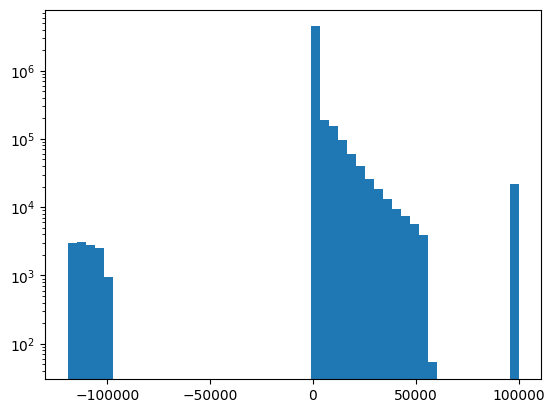

In [38]:
# genera un histograma de los valores de energía
energy_values = np.concatenate(list(first_run['ePix'])).ravel()

#energy_values = energy_values[energy_values != 1e10]
energy_values = energy_values.copy()
energy_values[energy_values == 1e10] = 1e5

#energy_values = energy_values[energy_values < -350]

plt.hist(energy_values, log=True, bins=50)
plt.show()

In [56]:
# matrices donde irán las imágenes de cada CCD
img = []
img_e10 = []
img_neg = []
for i in range(14):
    img.append(np.zeros((900, 4662)))
    img_e10.append(np.zeros((900, 4662)))
    img_neg.append(np.zeros((900, 4662)))

# itera a través de cada evento
for i in range(len(first_run['runID'])):
    
    x = first_run['xPix'][i]
    y = first_run['yPix'][i]
    e = first_run['ePix'][i].copy()
    
    e[e < -350] = -500
    e[e == 1e10] = 1e5
    
#     if (e == 1e5).any():   
#         mat = img_e10[int(first_run['ohdu'][i]) - 2]
#     elif (e < -350).any():
#         mat = img_neg[int(first_run['ohdu'][i]) - 2]
#     else:
#         mat = img[int(first_run['ohdu'][i]) - 2]
        
    mat = img[int(first_run['ohdu'][i]) - 2]
    
    #mat[y, x] = 1
    mat[y, x] = e
    #mat[y, x] = np.abs(e)

#mat = np.sqrt(mat, out=np.zeros_like(mat), where=(mat!=0))

# guarda las imagenes como archivos fits
mats_to_fits(img, 'connie_img')
mats_to_fits(img_e10, 'connie_e10')
mats_to_fits(img_neg, 'connie_neg')

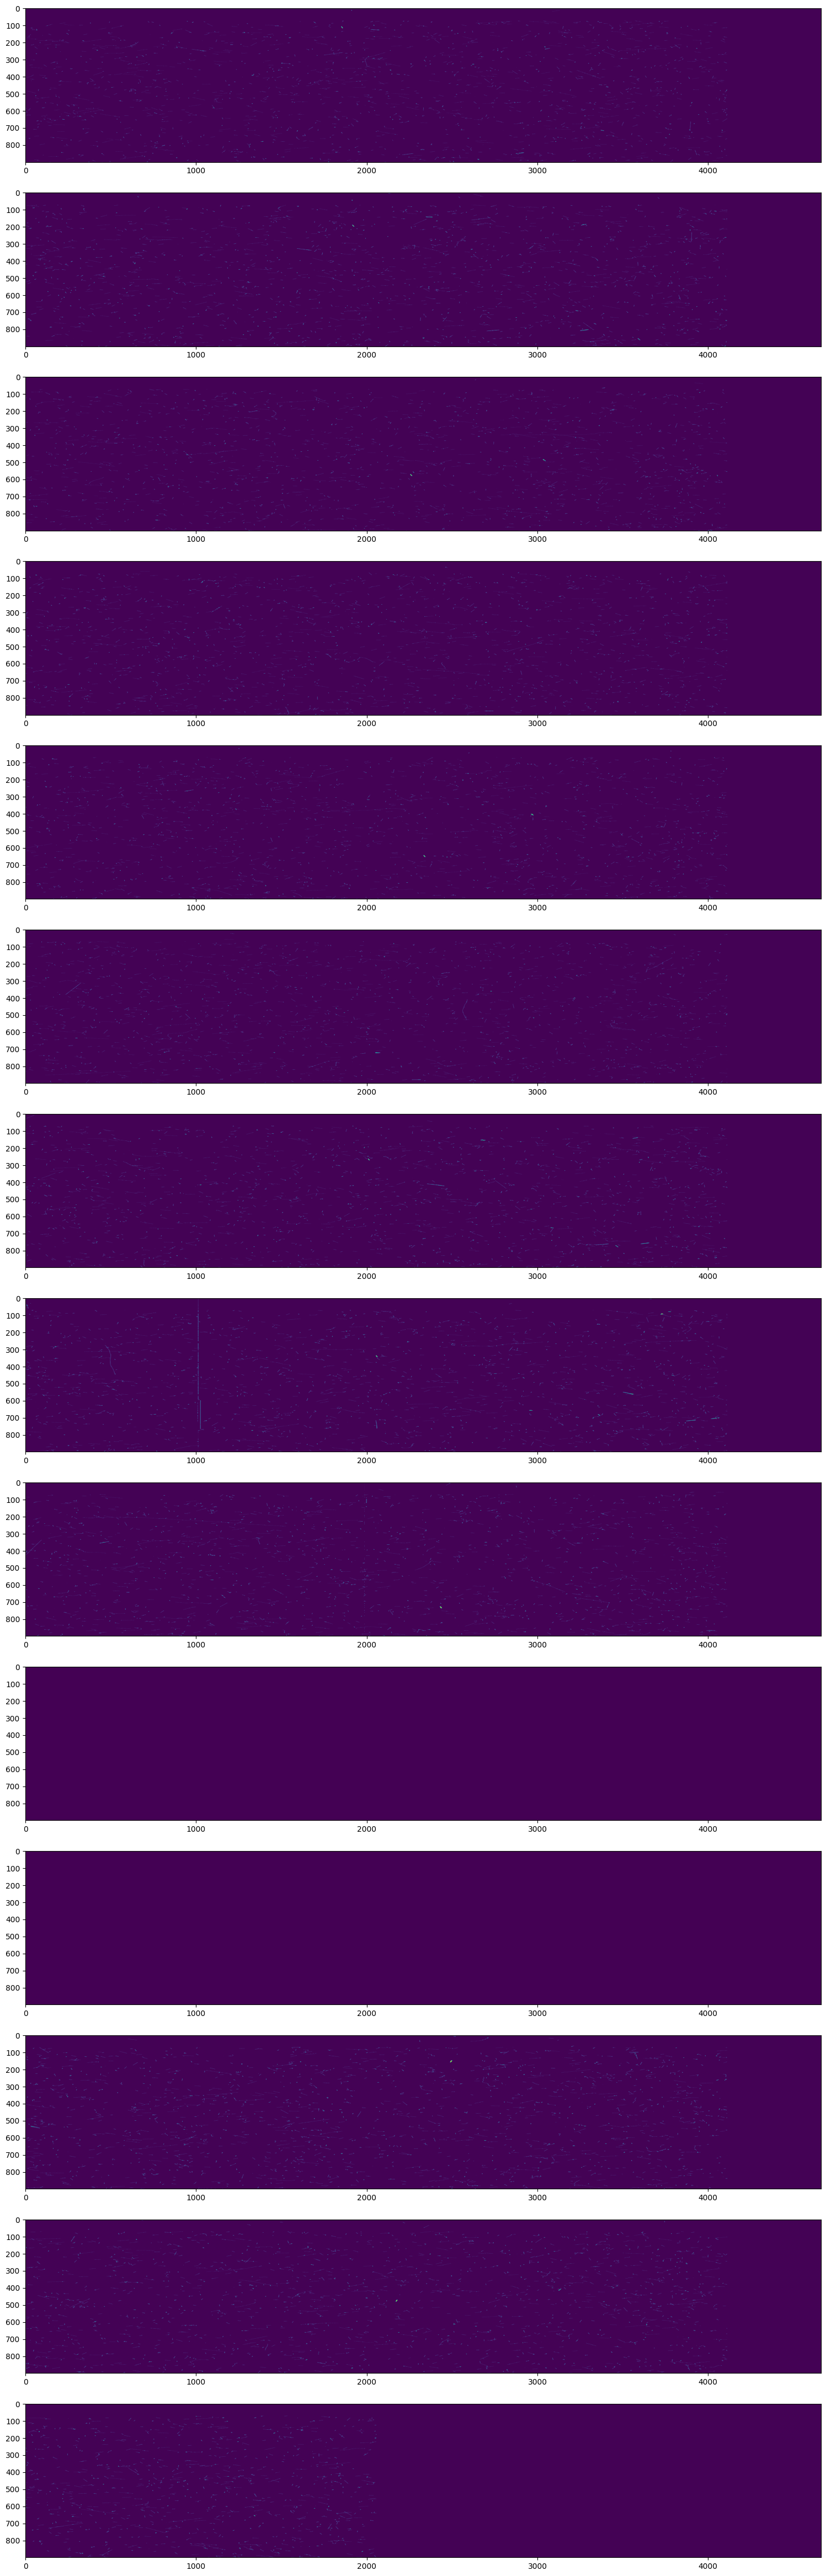

In [70]:
f, ax = plt.subplots(14, 1, figsize = (60, 60))
for i in range(14):
    ax[i].imshow(img[i])

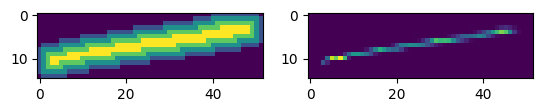

In [69]:
# selecciona una impacto dentro de la corrida
i = 1
hit = file['hitSumm;1'].arrays(entry_start=i, entry_stop=i+1, library="np")
for key, value in hit.items():
    hit[key] = hit[key][0]

# genera matrices donde almacenar la imagen
sizeX = hit['xMax'] - hit['xMin'] + 7
sizeY = hit['yMax'] - hit['yMin'] + 7
mat_level = np.zeros((sizeY, sizeX), dtype='int')
mat_e_pix = np.zeros((sizeY, sizeX))

# extrae las coordenadas del impacto
x = hit['xPix'] - hit['xMin'] + 3
y = hit['yPix'] - hit['yMin'] + 3

# extrae el nivel y la cantidad de energía
mat_level[y, x] = 4 - hit['level']
mat_e_pix[y, x] = hit['ePix']

# muestra las imágenes
f, ax = plt.subplots(1, 2)
ax[0].imshow(mat_level)
ax[1].imshow(mat_e_pix)
plt.show()